# Model Building

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Load data

In [2]:
# Read data
df = pd.read_csv('../data/games_formatted.csv')

df = df.dropna()
df.head()

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,GAME_DATE_EST,SEASON,HOME_TEAM_WINS
0,10500001,82.0,0.549,0.707317,0.390244,0.305,0.414634,0.195122,82.0,0.512,...,0.4,95.8,0.4351,0.6791,0.3258,22.8,42.7,2005-10-10,2005,0
1,10500002,82.0,0.524,0.609756,0.439024,0.402,0.512195,0.292683,82.0,0.622,...,0.6,101.9,0.4859,0.7998,0.4583,20.5,38.4,2005-10-11,2005,0
2,10500003,82.0,0.159,0.219512,0.097561,0.341,0.439024,0.243902,82.0,0.439,...,0.2,97.6,0.4624,0.6709,0.3665,20.6,41.8,2005-10-11,2005,0
3,10500004,82.0,0.659,0.780488,0.536585,0.659,0.756098,0.560976,82.0,0.573,...,0.5,102.1,0.4388,0.7533,0.4495,23.2,43.7,2005-10-11,2005,1
4,10500005,82.0,0.610,0.731707,0.487805,0.671,0.829268,0.512195,82.0,0.707,...,0.5,106.4,0.4555,0.7801,0.3558,17.6,44.5,2005-10-11,2005,0


In [3]:
df.isnull().sum()


GAME_ID                  0
G_home                   0
W_PCT_home               0
HOME_RECORD_home         0
ROAD_RECORD_home         0
W_PCT_prev_home          0
HOME_RECORD_prev_home    0
ROAD_RECORD_prev_home    0
G_away                   0
W_PCT_away               0
HOME_RECORD_away         0
ROAD_RECORD_away         0
W_PCT_prev_away          0
HOME_RECORD_prev_away    0
ROAD_RECORD_prev_away    0
WIN_PRCT_home_3g         0
PTS_home_3g              0
FG_PCT_home_3g           0
FT_PCT_home_3g           0
FG3_PCT_home_3g          0
AST_home_3g              0
REB_home_3g              0
WIN_PRCT_away_3g         0
PTS_away_3g              0
FG_PCT_away_3g           0
FT_PCT_away_3g           0
FG3_PCT_away_3g          0
AST_away_3g              0
REB_away_3g              0
WIN_PRCT_home_10g        0
PTS_home_10g             0
FG_PCT_home_10g          0
FT_PCT_home_10g          0
FG3_PCT_home_10g         0
AST_home_10g             0
REB_home_10g             0
WIN_PRCT_away_10g        0
P

## Split Train/Test Set

In [4]:
feat_cols = [
    'G_home', 'W_PCT_home', 'HOME_RECORD_home',
    'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
    'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
    'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
    'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
    'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
    'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
    'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
    'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
    'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
    'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g'
]
target = 'HOME_TEAM_WINS'

In [5]:
# Use season 2004 - 2018 as train set while season 2019 as test set
train_set = df.loc[(df['SEASON'] >= 2004) & (df['SEASON'] < 2019) ]
test_set = df.loc[(df['SEASON'] == 2019)]

In [6]:
# Check shape
print("Train set shape: ",train_set.shape)
print("Test set shape: ",test_set.shape)

Train set shape:  (19465, 46)
Test set shape:  (1241, 46)


In [7]:
# Split data into feature and target variables
X_train, y_train = train_set[feat_cols], train_set[target]
X_test, y_test = test_set[feat_cols], test_set[target]

In [8]:
df[target].value_counts()

1    12900
0     9012
Name: HOME_TEAM_WINS, dtype: int64

## Model choices
1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest
4. XGBoost


In [9]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [10]:
#scale data using standard scaling
standard_scaler = StandardScaler()
X_train_std_scaled = standard_scaler.fit_transform(X_train)
X_test_std_scaled = standard_scaler.transform(X_test)

#scale data using minmax scaling
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


## Train model

In [11]:


# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(verbosity = 0)
         }

# Create function to fit and score models
def evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        if(name == "Logistic Regression"):
            X = X_train_std_scaled
        elif(name == "KNN"):
            X = X_train_scaled
        else:
            X = X_train
            
        # Evaluate the model and append its score to model_scores
        model_scores[name] = np.mean(cross_val_score(model, X, y_train, scoring="roc_auc", cv= 5))
    return model_scores

In [12]:
model_scores = evaluate(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6130078536682845,
 'Logistic Regression': 0.6968374545245506,
 'Random Forest': 0.682163385864492,
 'XGBoost': 0.652890144453843}

## Baseline Model Cross validation score Comparison

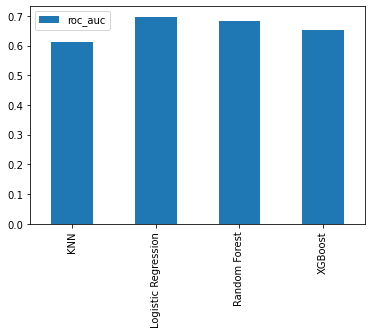

In [13]:
model_compare = pd.DataFrame(model_scores, index=['roc_auc'])
model_compare.T.plot.bar();

## Hyperparameter Tuning

In [14]:
# KNN

#Create KNN Object.
knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train_scaled, y_train)
#Predict test data set.
y_pred = knn.predict(X_test_scaled)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.42      0.48       575
           1       0.58      0.70      0.63       666

    accuracy                           0.57      1241
   macro avg       0.56      0.56      0.55      1241
weighted avg       0.56      0.57      0.56      1241

ROC score: 0.5589019454236845


In [15]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,15))
p=[1,2]


#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, scoring='roc_auc', cv=5)
#Fit the model
best_knn_model = clf.fit(X_train_scaled,y_train)
y_pred = best_knn_model.predict(X_test_scaled)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_knn_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_knn_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_knn_model.best_estimator_.get_params()['n_neighbors'])
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       575
           1       0.62      0.69      0.65       666

    accuracy                           0.61      1241
   macro avg       0.61      0.60      0.60      1241
weighted avg       0.61      0.61      0.61      1241

ROC score: 0.602855464159812


In [16]:
# Logistic Regression
C = [0.1,1,10,100]
log_reg_params_grid = dict(C=C)

log_reg = LogisticRegression()

log_reg_clf = GridSearchCV(log_reg, log_reg_params_grid, scoring='roc_auc', cv=5)
best_log_reg = log_reg_clf.fit(X_train_std_scaled,y_train)
y_pred_log_reg = best_log_reg.predict(X_test_std_scaled)

print('Best params', best_log_reg.best_params_)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_log_reg))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred_log_reg))

Best params {'C': 0.1}
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       575
           1       0.62      0.82      0.71       666

    accuracy                           0.64      1241
   macro avg       0.65      0.62      0.62      1241
weighted avg       0.65      0.64      0.62      1241

ROC score: 0.6235853244548897


In [ ]:
# Random Forest 
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]

rf_params_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

rf = RandomForestClassifier(random_state=20)
rf_clf = GridSearchCV(rf, rf_params_grid, scoring='roc_auc', cv = 5)
best_rf = rf_clf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

print('Best params', best_rf.best_params_)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_rf))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred_rf))

In [ ]:
# XGBoost
xgbr_params_grid = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = XGBClassifier(seed = 20, verbosity = 0 )

xgbr_clf = GridSearchCV(xgbr, xgbr_params_grid, scoring='roc_auc', cv = 5)
best_xgbr = xgbr_clf.fit(X_train, y_train)
y_pred_xgbr = best_xgbr.predict(X_test)

print("Best parameters:", best_xgbr.best_params_)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_xgbr))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred_xgbr))

In [ ]:
# Evaluate All Tuned Models
best_models = {"KNN": KNeighborsClassifier(leaf_size=1, n_neighbors=13, p=1),
          "Logistic Regression": LogisticRegression(C=10), 
          "Random Forest": RandomForestClassifier(max_depth= 8, min_samples_split= 10, n_estimators= 300),
          "XGBoost": XGBClassifier(colsample_bytree=0.3, learning_rate= 0.01, max_depth= 3, n_estimators= 500, 
                                   verbosity = 0)
         }

best_model_scores = evaluate(models=best_models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
best_model_scores

In [ ]:
best_model_compare = pd.DataFrame(best_model_scores, index=['roc_auc'])
best_model_compare.T.plot.bar();

In [ ]:
# Conclusion1: We will use Logistic Regression as our final model
trained_model = LogisticRegression(C=10).fit(X_train_std_scaled,y_train)

In [ ]:
y_pred = trained_model.predict(X_test_std_scaled)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("ROC score:",roc_auc_score(y_test, y_pred))

In [ ]:
# Conclusion2: When generating prediction using test set, the ROC score of Logistic Regression is 0.6235853244548897

## Save Model

In [ ]:
import joblib
joblib.dump(trained_model,'model.joblib')
joblib.dump(standard_scaler,'scaler.joblib')
